## Загрузка библиотек

In [343]:
import pandas as pd
import matplotlib.pyplot as plt
import random

## Загрузка данных

### Задание 1 (0.5 балла)

Для начала работы нам необходимо научиться читать набор данных. В данном домашнем задании мы поработаем с двумя наборами данных.

__covid.csv__ ([источник](https://www.kaggle.com/gpreda/covid-world-vaccination-progress)) - статистика по вакцинированию от COVID19 по разным странам. Для данного датасета нет конкретной предсказательной переменной.

__hr.csv__ ([источник](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists)) - набор данных большего размера. Он содержит статистику по людям, проходящим курсы по Big Data & ML. _Target_ - 1 или 0, сменил ли человек работу после прохождения курсов - или нет.

Реализуйте методы `read_covid_dataset` и `read_hr_dataset`. Каждый из них принимает на вход путь к набору данных и возвращает выборку `X` и соответствующие метки `y`. В случае _covid_ датасета `y` возвращается как `None`. 

In [344]:
def read_covid_dataset(path_to_csv):
    df = pd.read_csv("hw1_data/covid.csv", sep=",",  header = 0) # , decimal ='.')
    X = df
    y = None
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    return X, y


def read_hr_dataset(path_to_csv):
    df = pd.read_csv("hw1_data/hr.csv", sep=",",  header = 0, decimal ='.')
    X = df[df.columns.difference(['target'])]
    y = df['target']
    return X, y

In [345]:
COVID_DATA_PATH = "hw1_data/covid.csv"
HR_DATA_PATH = "hw1_data/hr.csv"

In [346]:
X_covid, _ = read_covid_dataset(COVID_DATA_PATH)
X_hr, y_hr = read_hr_dataset(HR_DATA_PATH)

## EDA

### Задание 2 (3.5 балла)

Выполните задание для датасетa _hr_.

Для дальнейшей работы с данными нужно обработать пропущенные значения в датасете.
Существуют различные стратегии обработки пропущенных данных.

#### 1.  (0.5 балла)

Для числовых признаков постройте распределения признаков. Для категориальных признаков выведите статистику по количеству значений признака. Отметим, что у нас три численных признака (city_development_index, enrollee_id, training_hours). Однако enrollee_id не имеет смысла в качестве числового признака, так как показывает номер города. Его график приведен ниже, что ещё раз доказывает, что это не является числовым признаком.

In [347]:
X_hr.head(10)

,city,city_development_index,company_size,company_type,education_level,enrolled_university,enrollee_id,experience,gender,last_new_job,major_discipline,relevent_experience,training_hours
0,city_103,0.920,NaN,NaN,Graduate,no_enrollment,8949,>20,Male,1,STEM,Has relevent experience,36
1,city_40,0.776,50-99,Pvt Ltd,Graduate,no_enrollment,29725,15,Male,>4,STEM,No relevent experience,47
2,city_21,0.624,NaN,NaN,Graduate,Full time course,11561,5,NaN,never,STEM,No relevent experience,83
3,city_115,0.789,NaN,Pvt Ltd,Graduate,NaN,33241,<1,NaN,never,Business Degree,No relevent experience,52
4,city_162,0.767,50-99,Funded Startup,Masters,no_enrollment,666,>20,Male,4,STEM,Has relevent experience,8
5,city_176,0.764,NaN,NaN,Graduate,Part time course,21651,11,NaN,1,STEM,Has relevent experience,24
6,city_160,0.920,50-99,Funded Startup,High School,no_enrollment,28806,5,Male,1,NaN,Has relevent experience,24
7,city_46,0.762,<10,Pvt Ltd,Graduate,no_enrollment,402,13,Male,>4,STEM,Has relevent experience,18
8,city_103,0.920,50-99,Pvt Ltd,Graduate,no_enrollment,27107,7,Male,1,STEM,Has relevent experience,46
9,city_103,0.920,10000+,Pvt Ltd,Graduate,no_enrollment,699,17,NaN,>4,STEM,Has relevent experience,123


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdcf049f890>,
      dtype=object)

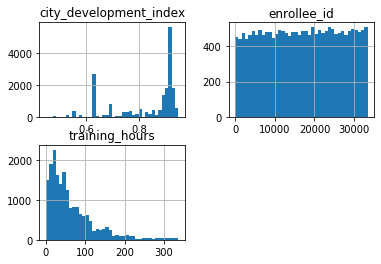

In [348]:
X_hr['city_development_index'] = pd.to_numeric(X_hr['city_development_index'])
X_hr[['city_development_index', 'enrollee_id', 'training_hours']].hist(bins=40)

Описательные численные характеристики численных признаков

In [349]:
X_hr[X_hr.columns.difference(['enrollee_id'])].describe()

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


Статистика для категориальных признаков

In [350]:
for i in X_hr[X_hr.columns.difference(['city_development_index', 'enrollee_id', 'training_hours'])].columns: 
    print(X_hr[i].value_counts())

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64
Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64
>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15 

#### 2.  (0.5 балла)
Удалите все строки, где есть хотя бы одно пропущенное значение признака. Насколько сильно уменьшился размер датасета? Как изменились распределения признаков/статистика по количеству значений признаков?

In [351]:
print(f'Исходный размер датасета hr {len(X_hr)}')

Исходный размер датасета hr 19158


In [352]:
X_hr_dropna = X_hr.dropna()
print(f'Pазмер датасета hr без NaN {len(X_hr_dropna)}')

Pазмер датасета hr без NaN 8955


In [353]:
print(f'Pазмер датасета covid без NaN {len(X_covid)}')

Pазмер датасета covid без NaN 2418


Изменение распределений признаков

Численные переменные:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdcd00d8410>,
      dtype=object)

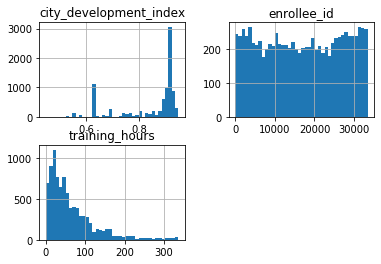

In [354]:
X_hr_dropna[['city_development_index', 'enrollee_id', 'training_hours']].hist(bins=40)

Описательные численные характеристики численных признаков

In [355]:
X_hr_dropna[X_hr_dropna.columns.difference(['enrollee_id'])].describe()

,city_development_index,training_hours
count,8955.000000,8955.000000
mean,0.844570,65.074930
std,0.116178,60.235087
min,0.448000,1.000000
25%,0.794000,23.000000
50%,0.910000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


Отмечу, что изменения по отношению к изначальному датасету незначительные

Изменения по количеству признаков следующие:

In [356]:
for i in X_hr[X_hr.columns.difference(['city_development_index', 'enrollee_id', 'training_hours'])].columns:
    print('До изменений')
    print(X_hr[i].value_counts().sort_index())
    print('После')
    print(X_hr_dropna[i].value_counts().sort_index())

До изменений
city_1       26
city_10      86
city_100    275
city_101     75
city_102    304
           ... 
city_93      26
city_94      26
city_97     104
city_98      79
city_99      94
Name: city, Length: 123, dtype: int64
После
city_1       13
city_10      52
city_100     82
city_101     24
city_102    126
           ... 
city_93      10
city_94      10
city_97      50
city_98      41
city_99      47
Name: city, Length: 116, dtype: int64
До изменений
10/49        1471
100-500      2571
1000-4999    1328
10000+       2019
50-99        3083
500-999       877
5000-9999     563
<10          1308
Name: company_size, dtype: int64
После
10/49         951
100-500      1814
1000-4999     930
10000+       1449
50-99        1986
500-999       592
5000-9999     393
<10           840
Name: company_size, dtype: int64
До изменений
Early Stage Startup     603
Funded Startup         1001
NGO                     521
Other                   121
Public Sector           955
Pvt Ltd                9817

После удаления строк потерялись все записи с уровнями образования High School и Primary School. К тому же потерялись записи о некоторых городах. Таким образом необходимо как-то иначе удалять пропушенные значения. 


Давайте попробуем избежать сокращения размера датасета.

#### 3.  (1 балл)
Для числовых признаков заполните пропущенные данные средним/медианой/модой данного признака. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

Проверим количество пропущенных значений:

In [357]:
print('Количество пропущенных значений в столбце city_development_index = '+ str(X_hr['city_development_index'].isna().sum()))
print('Количество пропущенных значений в столбце training_hours = '+ str(X_hr['training_hours'].isna().sum()))

Количество пропущенных значений в столбце city_development_index = 0
Количество пропущенных значений в столбце training_hours = 0


Как оказалось пропущенных значений нет, а следовательно и не нужно ничего заполнять. 

#### 4.  (1 балл)
Для категориальных признаков заполните пропущенные значения самой встречающейся категорией или создайте отдельную категорию пропущенных значений. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)


Проверим наш столбец цель на количество пропущенных значений:


In [358]:
y_hr.isna().sum()

0

пропущенных значений в столбце цель нет. 

In [359]:
X_hr.isna().sum()/len(X_hr)*100

city                       0.000000
city_development_index     0.000000
company_size              30.994885
company_type              32.049274
education_level            2.401086
enrolled_university        2.014824
enrollee_id                0.000000
experience                 0.339284
gender                    23.530640
last_new_job               2.207955
major_discipline          14.683161
relevent_experience        0.000000
training_hours             0.000000
dtype: float64

Обратим внимание, что есть категории в котрых достаточно много пропусков - порядка 30 процентов.Поэтому будем заполнять значения в этих столбцах отдельной категорией. Остальные можно было бы чем-то заполнить, не не буду, а просто удалю, так как их сумма процентов меньше 15 процентов. 

_Ваш ответ_

In [360]:
def fill_na(X, y):
    fulldata = X.join(y)
    Who_go_out = ['education_level','enrolled_university','experience','last_new_job']
    fulldata = fulldata.dropna(subset = Who_go_out)
    y_fill = fulldata['target']
    X_fill = fulldata[fulldata.columns.difference(['target'])].fillna('I do not know') 
    return X_fill, y_fill

In [361]:
X_hr_fill, y_hr_fill = fill_na(X_hr, y_hr)

#### 5.  (0.5 балла)
Как изменились распределения признаков/статистика по количеству значений признаков после заполнения пропущенных данных?

статистика по признакам

In [362]:
for i in X_hr[X_hr.columns.difference(['city_development_index', 'enrollee_id', 'training_hours'])].columns:
    print('До изменений')
    print(X_hr[i].value_counts().sort_index())
    print('После')
    print(X_hr_fill[i].value_counts().sort_index())

До изменений
city_1       26
city_10      86
city_100    275
city_101     75
city_102    304
           ... 
city_93      26
city_94      26
city_97     104
city_98      79
city_99      94
Name: city, Length: 123, dtype: int64
После
city_1       25
city_10      82
city_100    259
city_101     70
city_102    287
           ... 
city_93      24
city_94      24
city_97      99
city_98      77
city_99      91
Name: city, Length: 123, dtype: int64
До изменений
10/49        1471
100-500      2571
1000-4999    1328
10000+       2019
50-99        3083
500-999       877
5000-9999     563
<10          1308
Name: company_size, dtype: int64
После
10/49            1394
100-500          2483
1000-4999        1282
10000+           1964
50-99            2950
500-999           847
5000-9999         542
<10              1242
I do not know    5310
Name: company_size, dtype: int64
До изменений
Early Stage Startup     603
Funded Startup         1001
NGO                     521
Other                   121
P

Числнные переменные

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdccedaa450>,
      dtype=object)

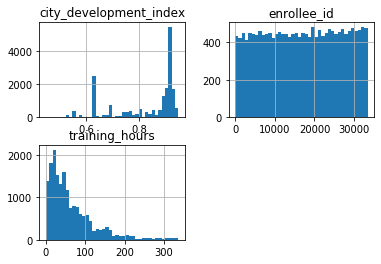

In [363]:
X_hr_fill[['city_development_index', 'enrollee_id', 'training_hours']].hist(bins=40)

In [364]:
X_hr_fill[X_hr_fill.columns.difference(['enrollee_id'])].describe()

,city_development_index,training_hours
count,18014.000000,18014.000000
mean,0.831728,65.347896
std,0.122115,60.059220
min,0.448000,1.000000
25%,0.745000,23.000000
50%,0.910000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


Численные переменные изменились мало. В категориальных пременных, как и раннее отмечалось есть существенный перекос в сторону заполненных значений. 

### Задание 3 (1 балл)

Выполните задание для датасета _covid_.

1. Найдите страну, для которой в датасете присутствует 46 дат со статистикой по вакцинации.
2. Постройте для этой страны график зависимости _total_vaccinations_ от _date_.
3. Заполните пропущенные данные о _total_vaccinations_ для этой страны. Объясните свой выбор.

In [365]:
X_covid.groupby('country')['date'].value_counts().groupby('country').value_counts()[X_covid.groupby('country')['date'].value_counts().groupby('country').value_counts() == 46]

country  date
Bahrain  1       46
Name: date, dtype: int64

In [366]:
data = X_covid[X_covid['country'] == 'Bahrain']

Страна - Бахрейн

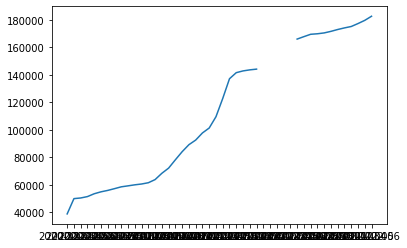

In [367]:
plt.plot(data['date'], data['total_vaccinations'])

На графике присутвиет разрыв. Вопрос о том, чем заполнить данную брешь существенный. Очевидно, что график должен монотонно возрастать (по смыслу), однако выбор функции не однозначен. Для простоты воспользуемся сплайном. (физики любят сплайны больше линейных зависимостей). Так они очень хорошо приблежают реальные графики, из которых известны только некоторые точки.

In [368]:
data['total_vaccinations'].interpolate(method='spline', order=5, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:7070: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


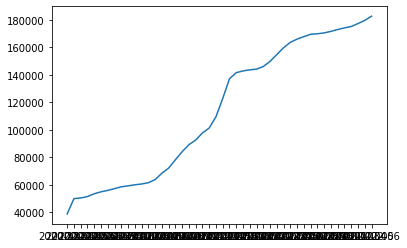

In [369]:
plt.plot(data['date'],data['total_vaccinations'])

### Задание 4  (0.5 балла)
Выполните задание для датасета _hr_.

Есть ли в данных выбросы? Если да, то скажите, какие и почему Вы считаете их выбросами?


отклонения в индексе развития городов 0
отклонения в часах подготовки 0


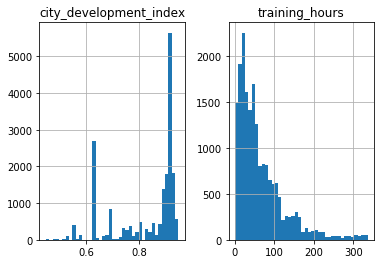

In [370]:
X_hr, y_hr 
X_hr[['city_development_index', 'training_hours']].hist(bins=40)

print('отклонения в индексе развития городов '+ str(sum(sum(list( [X_hr['city_development_index'] > 1] or [X_hr_fill_new['city_development_index'] < 0])))))
print('отклонения в часах подготовки '+ str(sum(sum(list(  [X_hr['training_hours'] < 0])))))

ВЫбросов в данных нет. Все находится в пределах допустимого. Графики подтверждают это. Есть разумеется большое количесвто городов с индексом развития чуть больше 0.6, но это можно объяснить тем, что много людей было опрошено в конкретном городе.

### Задание 5  (1 балл)
Выполните задание для датасета _hr_.

Закодируйте категориальные признаки при помощи One-hot encoding/Label encoding/Frequency encoding. Объясните свой выбор. (Обратите внимание, что некоторые категориальные признаки предполагают ранжирование в своих значениях). 
Ранговые критерии будем кодировать с помощью словаря. 

In [371]:
def encode(X):
    # ранговые
    X_encode = pd.DataFrame(X, copy=True)
    company_size_dict = {'I do not know':0, '<10': 1, '10/49': 2, '50-99': 3, '100-500': 4, '500-999': 5, '1000-4999': 6,
                        '5000-9999': 7, '10000+': 8}
    education_level_dict = {'I do not know':0,'Primary School':1,'High School':2, 'Graduate':3, 'Masters':4,'Phd':5}         
    experience_dict = {str(i-1): i for i in range(2, 22)} 
    experience_dict.update({'<1':1,'>20':22,'I do not know':0})
    last_new_job_dict = {'1':2,'2':3,'3':4,'4':5} 
    last_new_job_dict.update({'<1':1,'>4':6,'never':0})
    enrolled_university_dict = {'no_enrollment':0,'Part time course':1,'Full time course':2 }
    
   
    
    X_encode['company_size'] = X_encode.company_size.map(company_size_dict)
    X_encode['education_level'] = X_encode.education_level.map(education_level_dict)
    X_encode['experience'] = X_encode.experience.map(experience_dict)
    X_encode['last_new_job'] = X_encode.last_new_job.map(last_new_job_dict)
    X_encode['enrolled_university'] = X_encode.enrolled_university.map(enrolled_university_dict)
    
    #
    for col in X_encode.drop( ['last_new_job', 'company_size', 'experience', 'enrollee_id', 'enrolled_university', 'education_level', 'city_development_index', 'enrollee_id', 'training_hours'], axis=1):
        X_encode = pd.get_dummies(X_encode, prefix=[col], columns=[col])
        
    # Возвращает данные без категориальных признаков
    return X_encode

In [372]:
X_hr_encode = encode(X_hr_fill)

In [373]:
X_hr_encode.isna().sum()[X_hr_encode.isna().sum()!=0]

Series([], dtype: int64)

### Задание 6 (3.5 балла)

Выполните задание для датасета _hr_.




#### 1. (1 балл)
Реализуйте функцию undersampling

In [374]:
y_hr_fill.value_counts()

0.0    13593
1.0     4421
Name: target, dtype: int64

#### 2. (1 балл)
Реализуйте функцию oversampling

In [375]:
def undersampling(X, y):
    # Возвращает данные, сбалансированные методом undersampling (необходимо урезать больший)
    data = X.join(y)
    data_1 = data[data['target']==1.0]
    data_0 = data[data['target']==0.0]
    # ab = y_hr_fill.value_counts()
    # ad_m = ab[0]/ab[1]
    who_in = random.sample(list(range(len(data_0))), len(data_1))
    data_0 = data_0.iloc[who_in]
    data = pd.concat([data_0, data_1], axis=0)
    y_under = data['target']
    X_under = data.drop(['target'], axis=1)
    return X_under, y_under

def oversampling(X, y):
    # Возвращает данные, сбалансированные методом undersampling (нужно размножить меньший)
    data = X.join(y)
    data_1 = data[data['target']==1.0]
    data_0 = data[data['target']==0.0]
    ab = y_hr_fill.value_counts()
    ad_m = ab[0]//ab[1]
    ad_p = ab[0]-ad_m*ab[1]
    data_11 = pd.DataFrame(data_1, copy=True)
    who_in = random.sample(list(range(len(data_1))), ad_p)
    for i in range(ad_m-1):
        data_11 = pd.concat([data_11, data_1], axis=0)
    data_12 = data_1.iloc[who_in]
    data_1 = pd.concat([data_11, data_12], axis=0)
    data = pd.concat([data_0, data_1], axis=0)
    y_over = data['target']
    X_over = data.drop(['target'], axis=1)
    return X_over, y_over

In [376]:
X_hr_under, y_hr_under = undersampling(X_hr_encode, y_hr_fill)

X_hr_over, y_hr_over = oversampling(X_hr_encode, y_hr_fill)

#### 3. (1 балл)
Используйте _SMOTE_ для балансировки датасета.

Помимо методов _undersampling_ и _oversampling_ существует подход, генерирующий элементы класса-меньшинства, похожие на уже присутствующие в выборке данных. Такой метод называется _Synthetic Minority Oversampling Technique_ (SMOTE). 

Метод _SMOTE_ , реализованный в библиотеке `imblearn`, генерирует синтетические примеры при помощи __k-nearest neighbor__ алгоритма (подробнее об этом алгоритме будет рассказано на лекции).

In [377]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /opt/anaconda3/lib/python3.7/site-packages (0.7.0)
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [378]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_hr_encode, y_hr_fill)

# smote = # YOUR_CODE
# X_hr_SMOTE, y_hr_SMOTE = # YOUR_CODE

#### 4. (0.5 балла)
Как изменились распределения признаков при различных тактиках балансирования датасета?

In [379]:
for i in ['last_new_job', 'company_size', 'experience','education_level' ]:
    print('undersampling')
    print(X_hr_under[i].value_counts().sort_index()/sum(X_hr_under[i].value_counts())*100)
    print('oversampling')
    print(X_hr_over[i].value_counts().sort_index()/sum(X_hr_over[i].value_counts().sort_index())*100)
    print('smote')
    print(X_resampled[i].value_counts().sort_index()/sum(X_resampled[i].value_counts().sort_index())*100)

undersampling
0    13.141823
2    44.220765
3    15.256729
4     5.496494
5     5.202443
6    16.681746
Name: last_new_job, dtype: float64
oversampling
0    13.242110
2    44.173472
3    15.610976
4     5.326271
5     5.381446
6    16.265725
Name: last_new_job, dtype: float64
smote
0    12.311484
1     3.420878
2    43.882881
3    15.004046
4     6.679909
5     6.205400
6    12.495402
Name: last_new_job, dtype: float64
undersampling
0    36.609364
1     5.779235
2     7.679258
3    14.646008
4    12.090025
5     4.161954
6     6.084596
7     2.589912
8    10.359647
Name: company_size, dtype: float64
oversampling
0    36.367984
1     6.142868
2     7.478114
3    14.834841
4    12.116531
5     4.193335
6     6.120797
7     2.725668
8    10.019863
Name: company_size, dtype: float64
smote
0    33.793129
1     9.089237
2     9.501214
3    14.698742
4    11.476495
5     4.936364
6     5.889061
7     3.145001
8     7.470757
Name: company_size, dtype: float64
undersampling
1      3.257182
2   

Как видно по результатам все показатели более менее равны. Однако, у тех данных, что получены методом SMOTE все значения лучше приближаются к тому что было в изначальных данных 